# NYC Restaurant Inspection Results

In [22]:
import pandas as pd
from sodapy import Socrata
from config import API_Key, username, password
import requests
import json
import matplotlib.pyplot as plt
import re, datetime
import os
import folium
import json
print(folium.__version__)

0.8.3


## 1. Loading data from API

In [23]:
# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us", API_Key, username, password)

# Returned as JSON from API by sodapy.
data = client.get("43nn-pn8j",limit=381912)

## 2. Set up a base map
- Pass starting coordinates to Folium [lat,lon]
- tiles = `OpenStreetMap` by default, but we can also try `Stamen Terrain`,`Stamen Toner`, `Mapbox Bright`, and `Mapbox Control Room`
- Save map in a file `m.save('index.html')`

In [30]:
# Set up a base map
m = folium.Map(location=[40.730610, -73.935242],
               tiles='Stamen Terrain')

# Enable lat/lng popovers 
m.add_child(folium.LatLngPopup())

# Show map
m

## 3. Choropleth map

In [8]:
boros = list(violation_count['boro'].unique())

boro_data = []
for boro in boros:
    borough = violation_count.loc[violation_count['boro']==boro]['violation_count']
    boro_data.append(borough)
    
boros

['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']

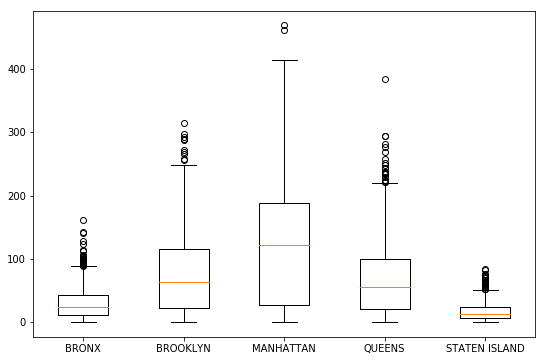

In [9]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(boro_data)

# Add tickers
ax.set_xticklabels(boros)

# Save the figure #fig.savefig('fig1.png', bbox_inches='tight')
plt.show()

In [10]:
cuisine_count = data_df.groupby(['cuisine_description'])[['dba','violation_code']].count()
#cuisine_count = pd.DataFrame(violation_count)
#cuisine_count = violation_count.reset_index()
cuisine_count

,dba,violation_code
cuisine_description,,
Afghan,168,166
African,1594,1572
American,82327,81209
Armenian,279,273
Asian,6039,5982
Australian,329,326
Bagels/Pretzels,2724,2693
Bakery,11598,11461
Bangladeshi,1066,1049


## 4. Mapping with folium

In [22]:
map_df = data_df.groupby(['boro','zipcode'])[['dba','inspection_type','violation_code']].count()
map_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 230 entries, (BRONX, 10451) to (STATEN ISLAND, 10314)
Data columns (total 3 columns):
dba                230 non-null int64
inspection_type    230 non-null int64
violation_code     230 non-null int64
dtypes: int64(3)
memory usage: 8.0+ KB
